In [1]:
# loading the necessary library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# reading the train file in variable name loan.
loan = pd.read_csv('train.csv')
loan.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
# checking the datatypes , nullvalues and the features.
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [4]:
# checking the number of null values in features.
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Male      489
Female    112
Name: Gender, dtype: int64

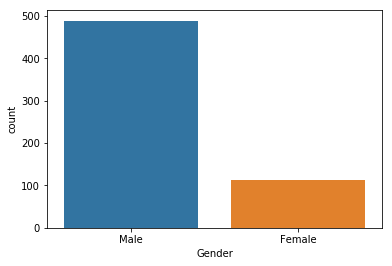

In [5]:
# checking the gender counts in data.
sns.countplot('Gender', data = loan)
loan.Gender.value_counts()

Married  Gender
No       Male      130
         Female     80
Yes      Male      357
         Female     31
Name: Gender, dtype: int64

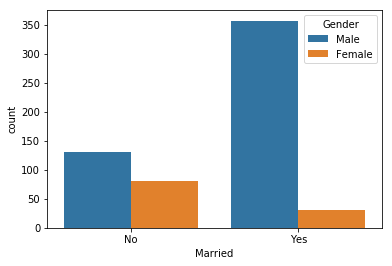

In [6]:
# checking the counts of gender on the basis of married.
sns.countplot('Married', data = loan, hue = 'Gender')
loan.groupby(by = 'Married')['Gender'].value_counts()

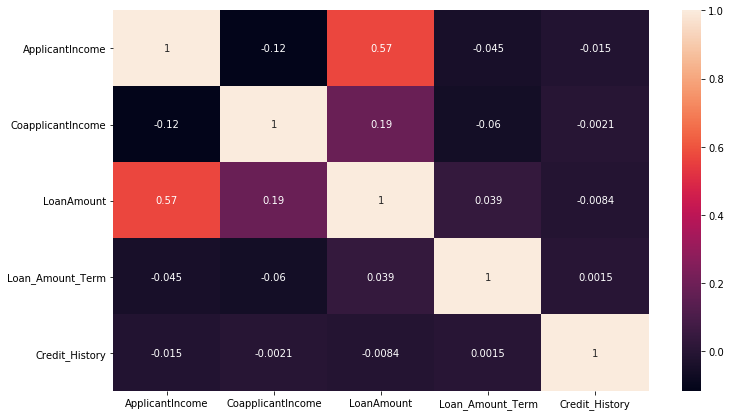

In [7]:
# plotting heat map to find the correlation.
plt.figure(figsize=(12,7))
sns.heatmap(loan.corr(), annot=True)

## interpretation

1. From the above heat map we can see that there is positive relation in applicantincome and loan amount. which means as the applicantincome rises the loan amount also increase.

2. Similarly in loanAmount with Loan_amount_term show a positive relationship, hence we can say that as the applicant takes more amount of loan then the LoanAmount_term is also likely to be high.



# dealing missing values

In [8]:
loan.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [9]:
# filling null values in gender with its mode values
loan['Gender'].fillna(loan['Gender'].mode()[0], inplace = True)

In [10]:
# filling null values in married with its mode values
loan['Married'].fillna(loan['Married'].mode()[0], inplace = True)

In [11]:
# filling null values in Dependents with its mode values
loan['Dependents'].fillna(loan['Dependents'].mode()[0] , inplace = True)

In [12]:
# filling null values in self_employed with its mode values
loan['Self_Employed'].fillna(loan['Self_Employed'].mode()[0], inplace = True)

### As we have noticed that Applicant income has a positive realtion with loanAmount.

### So, in order to fill the Null values in loanAmount. I took the mean approach from applicantIncome feature.

### First, I find the mean of Applicant Income, as you can see in output of below code i.e 5400, then i fill the null values with the Mean value of those applicant having the higher income of 5400, similarly for those having income below 5400.

In [13]:
# checking the mean of applicant income.
loan['ApplicantIncome'].agg(['min', 'max','mean'])

min       150.000000
max     81000.000000
mean     5403.459283
Name: ApplicantIncome, dtype: float64

In [14]:
# checking the mean of laon amount those having the applicantIncome above 5400.
loan[loan['ApplicantIncome']>5400].agg(['min', 'max','mean'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
min,LP001002,Female,No,0,Graduate,No,5417.000000,0.000000,26.000000,60.000000,0.000000,Rural,N
max,LP002984,Male,Yes,3+,Not Graduate,Yes,81000.000000,11300.000000,700.000000,480.000000,1.000000,Urban,Y
mean,NaN,NaN,NaN,NaN,NaN,NaN,10697.295455,1220.414773,216.366864,341.063584,0.864198,NaN,NaN


In [15]:
# filling the null values with the mean of loanAmount.
loan.loc[(loan['LoanAmount'].isnull())&(loan['ApplicantIncome']>5400),'LoanAmount']=216

In [16]:
# checking the mean of laon amount those having the applicantIncome below 5400.
loan[loan['ApplicantIncome']<5400].agg(['min', 'max','mean'])

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
min,LP001003,Female,No,0,Graduate,No,150.000000,0.00000,9.000000,12.000000,0.000000,Rural,N
max,LP002990,Male,Yes,3+,Not Graduate,Yes,5391.000000,41667.00000,350.000000,480.000000,1.000000,Urban,Y
mean,NaN,NaN,NaN,NaN,NaN,NaN,3276.255708,1782.31032,118.463357,342.379391,0.833333,NaN,NaN


In [17]:
# filling the null values with the mean of loanAmount.
loan.loc[(loan['LoanAmount'].isnull())&(loan['ApplicantIncome']<5400),'LoanAmount']=118

In [18]:
# filling null values in loan_amount_term with its mode.
loan['Loan_Amount_Term'].fillna(loan['Loan_Amount_Term'].mode()[0], inplace = True)

In [19]:
# filling null values in credit_history with its mode.
loan['Credit_History'].fillna(loan['Credit_History'].mode()[0], inplace = True)

In [20]:
# calculating monthly loan_term from annual Loan_term by dividing it by 12.
loan['loan_term_monthly'] = loan['Loan_Amount_Term']/12

# Preparing Data for Modelling 

In [21]:
# dropping Loan_id and Loan_amount_term
loan_new = loan.drop(loan[['Loan_ID','Loan_Amount_Term']], axis = 1)

In [22]:
# converting categorical columns into numerical
dummy_loan = pd.get_dummies(loan_new, drop_first= True)

In [23]:
# checking the shape of data after converting
dummy_loan.shape

(614, 15)

In [24]:
# dividing the data into 80 - 20 % in order to validate the performance of the model.
x = dummy_loan.iloc[:,0:14]
y = dummy_loan.iloc[:,-1]

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, Y_test = train_test_split(x,y, test_size = 0.20, random_state = 123)

In [25]:
# importing Random Forest model
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(max_depth=2)

In [26]:
# training the model
rf.fit(x_train, y_train)

D:\notebook\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=2, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
# model predict the loan_status on test data
rf_model = rf.predict(x_test)

In [28]:
# checking the performance of the model
from sklearn.metrics import confusion_matrix, accuracy_score
print(accuracy_score(Y_test, rf_model))
print(confusion_matrix(Y_test, rf_model))

0.7723577235772358
[[16 26]
 [ 2 79]]
